In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyreport import PlotUtil

%matplotlib qt
%load_ext autoreload

%autoreload 2

In [2]:
columns = ['strand_name', 'tof',
           'r_a_x', 'r_a_y', 'r_a_z',
           'v_a_x', 'v_a_y', 'v_a_z',
           'r_b_x', 'r_b_y', 'r_b_z',
           'd',
           'r_ab_sff_x', 'r_ab_sff_y', 'r_ab_sff_z']

file_path = "2021-02-22_09-53-18_Example_LOSAnalysis_sat_500km_97deg_to_Example.h5"
file_path = "example_data.h5"

row_limit = -1

store_500km = pd.HDFStore(file_path)
instances_500km_df = store_500km.select('contact_instances', 'columns = %s' % str(columns), stop = row_limit)

# Sort by pass id
instances_500km_df = instances_500km_df.sort_index(0)

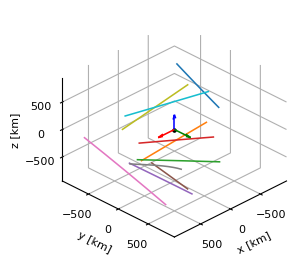

In [3]:
N_passes = 10

from hermes.postprocessing import *

fig = plt.figure(figsize=(3.2, 2.4))
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')

for i, pass_df in instances_500km_df.loc[0:N_passes,:].groupby(level=0):
    tof = pass_df.tof
    r_a = get_r_a(pass_df)
    r_b = get_r_b(pass_df)
    r_ab = (r_a - r_b)/1000
    x, y, z = r_ab[:,0], r_ab[:,1], r_ab[:,2]
    line, = ax.plot(x, y, z, linewidth=1.125)

ax.scatter(0, 0, 0, s=20, c='#000000', marker='.', )
ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlim(np.array([-1, 1]) * 900)
ax.set_ylim(np.array([-1, 1]) * 900)
ax.set_zlim(np.array([-1, 1]) * 900)


per = 0.3
u = ax.get_xlim()[1]*per
v = ax.get_ylim()[1]*per
w = ax.get_zlim()[1]*per

ax.quiver(0,0,0, u,0,0, length=1, normalize=False, linewidth=1.125, color = 'r')
ax.quiver(0,0,0, 0,v,0, length=1, normalize=False, linewidth=1.125, color = 'g')
ax.quiver(0,0,0, 0,0,w, length=1, normalize=False, linewidth=1.125, color = 'b')
ax.scatter(0, 0, 0, s=10, c='#000000', marker='.', )

ax.view_init(30, 45)
PlotUtil.apply_report_formatting_3D()
plt.savefig('D:/git/thesis_report_ae/figures/passes_eci.pgf')

fig

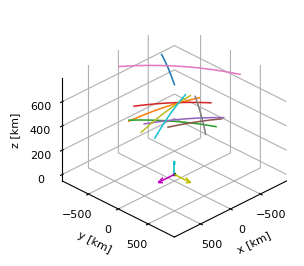

In [4]:
fig = plt.figure(figsize=(3.2, 2.4))
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')

for i, pass_df in instances_500km_df.loc[0:N_passes,:].groupby(level=0):
    tof = pass_df.tof
    r_ab_sff = get_r_ab_sff(pass_df) / 1000
    x, y, z = r_ab_sff[:,0], r_ab_sff[:,1], r_ab_sff[:,2]
    line, = ax.plot(x, y, z, linewidth=1.125)

#ax.scatter(0, 0, 0, s=20, c='#000000', marker='.', )

ax.set_xlabel('x [km]')
ax.set_ylabel('y [km]')
ax.set_zlabel('z [km]')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlim(np.array([-1, 1]) * 900)
ax.set_ylim(np.array([-1, 1]) * 900)
# # ax.set_zlim((-100, 100))
ax.view_init(30, 45)

per = 0.3
u = ax.get_xlim()[1]*per
v = ax.get_ylim()[1]*per
w = ax.get_zlim()[1]*per*0.5

# Plot coordinate system
ax.quiver(0,0,0, u,0,0, length=1, normalize=False, linewidth=1.125, color = 'm')
ax.quiver(0,0,0, 0,v,0, length=1, normalize=False, linewidth=1.125, color = 'y')
ax.quiver(0,0,0, 0,0,w, length=1, normalize=False, linewidth=1.125, color = 'c')
ax.scatter(0, 0, 0, s=10, c='#000000', marker='.', )

plt.grid()
plt.subplots_adjust(bottom=0.1)
PlotUtil.apply_report_formatting_3D()
plt.savefig('D:/git/thesis_report_ae/figures/passes_scf.pgf')

fig

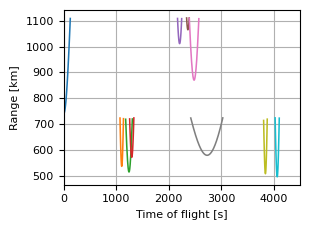

In [5]:
fig = plt.figure(figsize=(3.2, 2.4))

for i, pass_df in instances_500km_df.loc[0:N_passes,:].groupby(level=0):
    tof = pass_df.tof
    d = pass_df.d/1000
    line, = plt.plot(tof, d, linewidth=1.125)

plt.xlabel('Time of flight [s]')
plt.ylabel('Range [km]')
plt.xlim((0, 4500))

plt.grid()
PlotUtil.apply_report_formatting()
plt.tight_layout()
plt.savefig('D:/git/thesis_report_ae/figures/range.pgf')

fig

## Sky plot

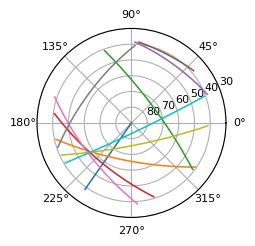

In [6]:
fig = plt.figure(figsize=(2.4, 2.4))
ax = plt.subplot(1,1,1, projection='polar')

def xyz_to_shperical(xyz):
    xy = xyz[:,0]**2 + xyz[:,1]**2
    r = np.sqrt(xy + xyz[:,2]**2)
    theta = np.arctan2(np.sqrt(xy), xyz[:,2]) # for elevation angle defined from Z-axis down
    phi = np.arctan2(xyz[:,1], xyz[:,0])
    return r, theta, phi

for i, pass_df in instances_500km_df.loc[0:N_passes,:].groupby(level=0):
    r_ab_sff = get_r_ab_sff(pass_df) / 1000
    r, theta, phi = xyz_to_shperical(r_ab_sff)
    line, = plt.polar(phi, theta * 180 / np.pi, linewidth=1.125)

plt.yticks(ticks=plt.yticks()[0], labels=["%d" % v for v in 90 - np.array(plt.yticks()[0])])
#plt.grid()
thetaticks = np.arange(0,360,45)
ax.tick_params('x', pad = -0.75)
PlotUtil.apply_report_formatting()

plt.tight_layout(pad=0.5, rect=(0,0,1.05,1.0))

# plt.subplots_adjust(bottom=0.1)
plt.savefig('D:/git/thesis_report_ae/figures/skyplot.pgf')

fig

In [7]:
plt.close('all')